In [295]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler #for standardization
#for feature selection:
from sklearn.linear_model import Lasso, LassoCV
#for model training and performance measure
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import mean_squared_error, mean_absolute_error, explained_variance_score
import matplotlib.pyplot as plt
#visualising columns in dataframe
pd.pandas.set_option('display.max_columns', None)

# 1.1 Importing and Reading the Dataset


In [296]:
hp_dataset = pd.read_csv("/content/Housing Pricing.csv", delimiter = ',')
hp_dataset.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [297]:
hp_dataset.shape

(1460, 77)

# 1.2 Data Cleaning

In [298]:
# Dropping the "Id" column because it's irrelevant
hp_dataset.drop(["Id"], axis = 1, inplace = True)
hp_dataset.head(5)

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,0,12,2008,WD,Normal,250000


In [299]:
# There are 1460 rows and 76 columns
# We have 75 features (x) and 1 target which is the "SalePrice" (y)
hp_dataset.shape

(1460, 76)

In [300]:
# Checking for missing values
print(hp_dataset.isnull().any())

MSSubClass       False
MSZoning         False
LotFrontage       True
LotArea          False
Street           False
                 ...  
MoSold           False
YrSold           False
SaleType         False
SaleCondition    False
SalePrice        False
Length: 76, dtype: bool


In [301]:
# Creating a list of the features (x) with missing values
missing_values = list(hp_dataset.columns[hp_dataset.isnull().any()])
missing_values

['LotFrontage',
 'MasVnrType',
 'MasVnrArea',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [302]:
# There are 15 columns with missing values
len(missing_values)

15

# 1.2.1 Dealing with Missing Values


1.   Mean Filling - Fills the missing values of all numerical feature columns with their respective mean values
2.   Forward Filling - Fills the missing values with the last observed value in row or column ie the previous values
3.   Back Filling - Fills the missing values with the next observed value in row or column.



In [303]:
# Accessing the datatype information of the respective columns with missing values
for feature in missing_values:
  # Printing the feature and its respective datatype
  print(f"{feature} {hp_dataset[feature].dtype}")

LotFrontage float64
MasVnrType object
MasVnrArea float64
BsmtQual object
BsmtCond object
BsmtExposure object
BsmtFinType1 object
BsmtFinType2 object
Electrical object
FireplaceQu object
GarageType object
GarageYrBlt float64
GarageFinish object
GarageQual object
GarageCond object


In [304]:
# Creating lists for the missing value columns (features) with "float64" and "object" datatypes
floats = []
objects = []

In [305]:
# Adding the features to their respective lists
for feature in missing_values:
  if hp_dataset[feature].dtype == "float64":
    floats.append(feature)
  else:
    objects.append(feature)

In [306]:
floats

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [307]:
objects

['MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond']

In [308]:
# Filling the missing values in the "floats" list with the mean values
for feature in floats:
  hp_dataset[feature].fillna(hp_dataset[feature].mean(),inplace=True)

In [309]:
# Filling the missing values in the "objects" list with the previous values (Foward Filling)
for feature in objects:
  hp_dataset[feature].fillna(method='ffill',inplace=True)

In [310]:
# Checking if there are still missing values in the dataset
hp_dataset.columns[hp_dataset.isna().any()]

Index(['FireplaceQu'], dtype='object')

In [311]:
# Since the feature "FireplaceQu" has a missing value in the 1st row, we use Back Filling since Forward Filling can't work
hp_dataset['FireplaceQu'].fillna(method="bfill",inplace=True)

In [312]:
# Checking if there are still missing values in the dataset
hp_dataset.columns[hp_dataset.isna().any()]

Index([], dtype='object')

# 1.3 Encoding the Dataset



*   Categorical Data - collection of information that is divided into groups. It's divided into two:-

        1.   Ordinal Data: The categories have an inherent order
             Example: Satisfaction Rating such as “extremely dislike”, “dislike”, “neutral”, “like”, “extremely like”.
        2.   Nominal Data: The categories do not have an inherent order
             Examples: Country, gender, race, hair color etc.


*   Data Encoding Techniques

        1.   Label Encoding - Used when the categorical feature is ordinal.
        2.   One Hot Encoding - Used when the categorical features are nominal.










In [313]:
# Grouping the numerical features into one list:- Features that deal with number variables.
numerical_features = list(hp_dataset.select_dtypes(include=['float64','int64']).columns)
numerical_features

['MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFinSF1',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageYrBlt',
 'GarageCars',
 'GarageArea',
 'WoodDeckSF',
 'OpenPorchSF',
 'EnclosedPorch',
 '3SsnPorch',
 'ScreenPorch',
 'PoolArea',
 'MiscVal',
 'MoSold',
 'YrSold',
 'SalePrice']

In [314]:
len(numerical_features)

37

In [315]:
hp_dataset[numerical_features]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,62.0,7917,6,5,1999,2000,0.0,0,0,953,953,953,694,0,1647,0,0,2,1,3,1,7,1,1999.0,2,460,0,40,0,0,0,0,0,8,2007,175000
1456,20,85.0,13175,6,6,1978,1988,119.0,790,163,589,1542,2073,0,0,2073,1,0,2,0,3,1,7,2,1978.0,2,500,349,0,0,0,0,0,0,2,2010,210000
1457,70,66.0,9042,7,9,1941,2006,0.0,275,0,877,1152,1188,1152,0,2340,0,0,2,0,4,1,9,2,1941.0,1,252,0,60,0,0,0,0,2500,5,2010,266500
1458,20,68.0,9717,5,6,1950,1996,0.0,49,1029,0,1078,1078,0,0,1078,1,0,1,0,2,1,5,0,1950.0,1,240,366,0,112,0,0,0,0,4,2010,142125


In [316]:
# Grouping the categorical features into one list
categorical_features = list(hp_dataset.select_dtypes(include=['object']).columns)
categorical_features

['MSZoning',
 'Street',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [317]:
len(categorical_features)

39

In [318]:
# Dividing the Categorical features into norminal and ordinal features
norminal_features = ['Street', 'Neighborhood', 'Exterior1st', 'Exterior2nd']
ordinal_features = list(set(categorical_features) - set(norminal_features))

# 1.3.1 Label Encoding for Ordinal Features

In [319]:
for feature in ordinal_features:
  hp_dataset[feature] = hp_dataset[feature].astype('category').cat.codes

encoded_ordinal_features = hp_dataset[ordinal_features]

In [320]:
encoded_ordinal_features

,SaleType,KitchenQual,BldgType,Foundation,BsmtFinType2,Functional,ExterCond,HouseStyle,GarageCond,ExterQual,PavedDrive,MasVnrType,LandSlope,LotConfig,GarageFinish,BsmtFinType1,HeatingQC,LotShape,Electrical,SaleCondition,LandContour,RoofStyle,BsmtQual,GarageType,Heating,CentralAir,Condition2,RoofMatl,FireplaceQu,Condition1,MSZoning,GarageQual,Utilities,BsmtCond,BsmtExposure
0,8,2,0,2,5,6,4,5,4,2,2,1,0,4,1,2,0,3,4,4,3,1,2,1,1,1,2,1,4,2,3,4,0,3,3
1,8,3,0,1,5,6,4,2,4,3,2,2,0,2,1,0,0,3,4,4,3,1,2,1,1,1,2,1,4,1,3,4,0,3,1
2,8,2,0,2,5,6,4,5,4,2,2,1,0,4,1,2,0,0,4,4,3,1,2,1,1,1,2,1,4,2,3,4,0,3,2
3,8,2,0,0,5,6,4,5,4,3,2,2,0,0,2,0,2,0,4,0,3,1,3,5,1,1,2,1,2,2,3,4,0,1,3
4,8,2,0,2,5,6,4,5,4,2,2,1,0,2,1,2,0,0,4,4,3,1,2,1,1,1,2,1,4,2,3,4,0,3,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,8,3,0,2,5,6,4,5,4,3,2,2,0,4,1,5,0,3,4,4,3,1,2,1,1,1,2,1,4,2,3,4,0,3,3
1456,8,3,0,1,4,2,4,2,4,3,2,3,0,4,2,0,4,3,4,4,3,1,2,1,1,1,2,1,4,2,3,4,0,3,3
1457,8,2,0,4,5,6,2,5,4,0,2,2,0,4,1,2,0,3,4,4,3,1,3,1,1,1,2,1,2,2,3,4,0,1,3
1458,8,2,0,1,4,6,4,2,4,3,2,2,0,4,2,2,2,3,0,4,3,3,3,1,1,1,2,1,2,2,3,4,0,3,2


# 1.3.2 One Hot Encoding for Norminal Features

In [321]:
encoded_norminal_features = pd.get_dummies(data=hp_dataset[norminal_features],drop_first=True)
encoded_norminal_features

,Street_Pave,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng
0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1456,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
1457,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
1458,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0


# 1.3.3 Forming a New Dataset



In [322]:
# Combining the numerical_features, encoded_norminal_features and encoded_ordinal_features into a new dataframe
new_hp_dataset = pd.concat([encoded_norminal_features,encoded_ordinal_features,hp_dataset[numerical_features]],axis=1)
new_hp_dataset

,Street_Pave,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,SaleType,KitchenQual,BldgType,Foundation,BsmtFinType2,Functional,ExterCond,HouseStyle,GarageCond,ExterQual,PavedDrive,MasVnrType,LandSlope,LotConfig,GarageFinish,BsmtFinType1,HeatingQC,LotShape,Electrical,SaleCondition,LandContour,RoofStyle,BsmtQual,GarageType,Heating,CentralAir,Condition2,RoofMatl,FireplaceQu,Condition1,MSZoning,GarageQual,Utilities,BsmtCond,BsmtExposure,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,8,2,0,2,5,6,4,5,4,2,2,1,0,4,1,2,0,3,4,4,3,1,2,1,1,1,2,1,4,2,3,4,0,3,3,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,8,3,0,1,5,6,4,2,4,3,2,2,0,2,1,0,0,3,4,4,3,1,2,1,1,1,2,1,4,1,3,4,0,3,1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,8,2,0,2,5,6,4,5,4,2,2,1,0,4,1,2,0,0,4,4,3,1,2,1,1,1,2,1,4,2,3,4,0,3,2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,2,0,0,5,6,4,5,4,3,2,2,0,0,2,0,2,0,4,0,3,1,3,5,1,1,2,1,2,2,3,4,0,1,3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,8,2,0,2,5,6,4,5,4,2,2,1,0,2,1,2,0,0,4,4,3,1,2,1,1,1,2,1,4,2,3,4,0,3,0,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,8,3,0,2,5,6,4,5,4

In [323]:
new_hp_dataset.shape 

(1460, 126)

# 1.4 Standardization

In [324]:
#standardizing the dataset
X_features = new_hp_dataset.drop('SalePrice', axis=1)
X_feat_arr = np.array(X_features)
X_features

,Street_Pave,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,SaleType,KitchenQual,BldgType,Foundation,BsmtFinType2,Functional,ExterCond,HouseStyle,GarageCond,ExterQual,PavedDrive,MasVnrType,LandSlope,LotConfig,GarageFinish,BsmtFinType1,HeatingQC,LotShape,Electrical,SaleCondition,LandContour,RoofStyle,BsmtQual,GarageType,Heating,CentralAir,Condition2,RoofMatl,FireplaceQu,Condition1,MSZoning,GarageQual,Utilities,BsmtCond,BsmtExposure,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,8,2,0,2,5,6,4,5,4,2,2,1,0,4,1,2,0,3,4,4,3,1,2,1,1,1,2,1,4,2,3,4,0,3,3,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,8,3,0,1,5,6,4,2,4,3,2,2,0,2,1,0,0,3,4,4,3,1,2,1,1,1,2,1,4,1,3,4,0,3,1,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007
2,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,8,2,0,2,5,6,4,5,4,2,2,1,0,4,1,2,0,0,4,4,3,1,2,1,1,1,2,1,4,2,3,4,0,3,2,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008
3,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,8,2,0,0,5,6,4,5,4,3,2,2,0,0,2,0,2,0,4,0,3,1,3,5,1,1,2,1,2,2,3,4,0,1,3,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,8,2,0,2,5,6,4,5,4,2,2,1,0,2,1,2,0,0,4,4,3,1,2,1,1,1,2,1,4,2,3,4,0,3,0,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,8,3,0,2,5,6,4,5,4,3,2,2,0,4,1,5,0,3,4,4,3,1,2,1,1,1,2,1,4,2,3,4,0,

In [325]:
target= ['SalePrice']
Y_targ = new_hp_dataset[target]
Y = np.array(new_hp_dataset[target])
Y.shape

(1460, 1)

In [326]:
X_feat_arr = StandardScaler().fit_transform(X_feat_arr)
Y = StandardScaler().fit_transform(Y)

# 1.5 Performing feature selection using L1 

In [327]:
#Performing feature selection using Lasso
regressor = LassoCV()
regressor.fit(X_feat_arr, Y)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:1088: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
        max_iter=1000, n_alphas=100, n_jobs=None, normalize=False,
        positive=False, precompute='auto', random_state=None,
        selection='cyclic', tol=0.0001, verbose=False)

Text(0.5, 1.0, 'Lasso Feature Selection')

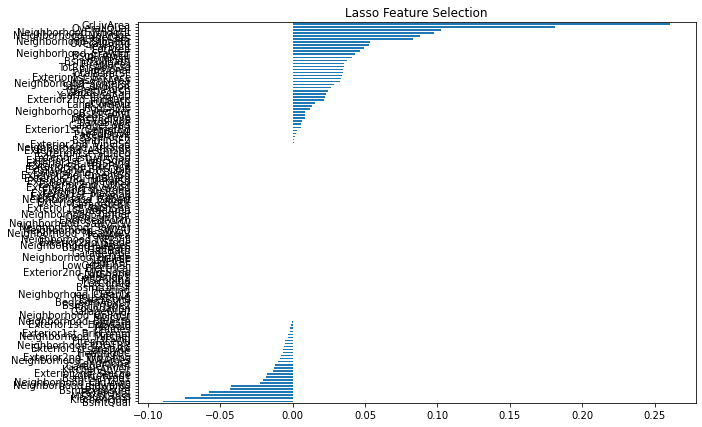

In [328]:
coefficient_column = pd.Series(regressor.coef_, index=X_features.columns)

ranked_coefs = coefficient_column.sort_values()
plt.rcParams['figure.figsize'] = (10.0, 7.0)
ranked_coefs.plot(kind="barh")

plt.title("Lasso Feature Selection")

In [329]:
f_selected = []
for label, value in zip(coefficient_column.index, coefficient_column.values):
  if value != 0:
    f_selected.append(label)

f_selected

['Street_Pave',
 'Neighborhood_BrkSide',
 'Neighborhood_Crawfor',
 'Neighborhood_Edwards',
 'Neighborhood_IDOTRR',
 'Neighborhood_Mitchel',
 'Neighborhood_NWAmes',
 'Neighborhood_NoRidge',
 'Neighborhood_NridgHt',
 'Neighborhood_OldTown',
 'Neighborhood_Somerst',
 'Neighborhood_StoneBr',
 'Neighborhood_Veenker',
 'Exterior1st_BrkComm',
 'Exterior1st_BrkFace',
 'Exterior1st_CemntBd',
 'Exterior1st_HdBoard',
 'Exterior1st_ImStucc',
 'Exterior2nd_ImStucc',
 'Exterior2nd_Stucco',
 'Exterior2nd_VinylSd',
 'Exterior2nd_Wd Shng',
 'SaleType',
 'KitchenQual',
 'BldgType',
 'Functional',
 'GarageCond',
 'ExterQual',
 'PavedDrive',
 'MasVnrType',
 'LandSlope',
 'GarageFinish',
 'BsmtFinType1',
 'HeatingQC',
 'SaleCondition',
 'LandContour',
 'RoofStyle',
 'BsmtQual',
 'CentralAir',
 'Condition2',
 'RoofMatl',
 'FireplaceQu',
 'Utilities',
 'BsmtCond',
 'BsmtExposure',
 'MSSubClass',
 'LotFrontage',
 'LotArea',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'MasVnrArea',
 'BsmtFi

In [330]:
combined_X_features = pd.DataFrame(X_feat_arr, columns=X_features.columns)

combined_X_features

,Street_Pave,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,SaleType,KitchenQual,BldgType,Foundation,BsmtFinType2,Functional,ExterCond,HouseStyle,GarageCond,ExterQual,PavedDrive,MasVnrType,LandSlope,LotConfig,GarageFinish,BsmtFinType1,HeatingQC,LotShape,Electrical,SaleCondition,LandContour,RoofStyle,BsmtQual,GarageType,Heating,CentralAir,Condition2,RoofMatl,FireplaceQu,Condition1,MSZoning,GarageQual,Utilities,BsmtCond,BsmtExposure,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold
0,0.064238,-0.037037,-0.105263,-0.203395,-0.139832,2.955221,-0.190252,-0.271163,-0.239176,-0.16125,-0.10854,-0.186352,-0.426833,-0.078757,-0.229416,-0.169981,-0.235958,-0.289638,-0.131991,-0.231065,-0.205214,-0.250182,-0.131991,-0.163471,-0.087129,-0.02618,-0.037037,-0.188311,-0.02618,-0.208812,-0.423464,-0.02618,-0.421212,-0.282633,-0.037037,-0.131991,1.354604,-0.405308,-0.134652,-0.045376,-0.069409,-0.131991,-0.02618,-0.207020,-0.406452,-0.083045,-0.414427,-0.02618,-0.328236,-0.058621,-0.134652,1.377253,-0.39494,-0.163471,0.313867,-0.409369,-0.411691,0.835599,0.310256,0.255978,0.364207,1.026689,0.191521,-0.777976,0.289745,-1.236344,-0.225716,0.604670,-0.227521,-0.398741,-0.884658,0.750731,0.302403,0.208502,0.314667,-0.491516,-0.299527,-0.723276,-0.123046,0.263813,-0.03174,-0.125797,1.101344,-0.036289,-0.045532,0.227228,-0.02618,0.286468,0.638078,0.073375,-0.229372,-0.207142,0.651479,-0.517200,1.050994,0.878668,0.511418,0.575425,-0.288653,-0.944591,-0.459303,-0.793434,1.161852,-0.120242,0.370333,1.107810,-0.241061,0.789741,1.227585,0.163779,-0.211454,0.912210,-0.951226,1.021157,0.311725,0.351000,-0.752176,0.216503,-0.359325,-0.116339,-0.270208,-0.068692,-0.087688,-1.599111,0.138777
1,0.064238,-0.037037,-0.105263,-0.203395,-0.139832,-0.338384,-0.190252,-0.271163,-0.239176,-0.16125,-0.10854,-0.186352,-0.426833,-0.078757,-0.229416,-0.169981,-0.235958,-0.289638,-0.131991,-0.231065,-0.205214,-0.250182,-0.131991,-0.163471,11.477250,-0.02618,-0.037037,-0.188311,-0.02618,-0.208812,-0.423464,-0.02618,2.374103,-0.282633,-0.037037,-0.131991,-0.738223,-0.405308,-0.134652,-0.045376,-0.069409,-0.131991,-0.02618,-0.207020,-0.406452,-0.083045,2.412971,-0.02618,-0.328236,-0.058621,-0.134652,-0.726083,-0.39494,-0.163471,0.313867,0.795629,-0.411691,-0.549162,0.310256,0.255978,0.364207,-0.543457,0.191521,0.663451,0.289745,0.389838,-0.225716,-0.628316,-0.227521,-1.492001,-0.884658,0.750731,0.302403,0.208502,0.314667,-0.491516,-0.299527,-0.723276,-0.123046,0.263813,-0.03174,-0.125797,1.101344,-1.188074,-0.045532,0.227228,-0.02618,0.286468,-1.109753,-0.872563,0.451936,-0.091886,-0.071836,2.179628,0.156734,-0.429577,-0.574410,1.171992,-0.28

In [331]:
Y = pd.DataFrame(Y, columns=Y_targ.columns)
Y

,SalePrice
0,0.347273
1,0.007288
2,0.536154
3,-0.515281
4,0.869843
...,...
1455,-0.074560
1456,0.366161
1457,1.077611
1458,-0.488523


In [332]:
# Split the data set into test and training set in the ratio 80:20
X_train, X_test, y_train, y_test = train_test_split(combined_X_features, Y, test_size=0.2)
X_train.shape

(1168, 125)

# Model Training

In [333]:
sq = Sequential()

# Layer 1
sq.add(Dense(78, activation='relu'))
sq.add(Dropout(0.2))

# Hidden Layer 2
sq.add(Dense(39, activation='relu'))
sq.add(Dropout(0.2))

# Hidden Layer 3
sq.add(Dense(19, activation='relu'))
sq.add(Dropout(0.2))

# Output Layer
sq.add(Dense(units=1, activation='sigmoid'))

sq.compile(loss='mse', optimizer='adam')

Model Fitting

In [334]:
sq.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=150, batch_size=256)

Epoch 1/150
5/5 [==============================] - 2s 100ms/step - loss: 1.3120 - val_loss: 1.0449
Epoch 2/150
5/5 [==============================] - 0s 8ms/step - loss: 1.1724 - val_loss: 0.9249
Epoch 3/150
5/5 [==============================] - 0s 8ms/step - loss: 1.0525 - val_loss: 0.8402
Epoch 4/150
5/5 [==============================] - 0s 13ms/step - loss: 0.8530 - val_loss: 0.7772
Epoch 5/150
5/5 [==============================] - 0s 9ms/step - loss: 0.8777 - val_loss: 0.7237
Epoch 6/150
5/5 [==============================] - 0s 8ms/step - loss: 0.7937 - val_loss: 0.6798
Epoch 7/150
5/5 [==============================] - 0s 9ms/step - loss: 0.7420 - val_loss: 0.6467
Epoch 8/150
5/5 [==============================] - 0s 8ms/step - loss: 0.6947 - val_loss: 0.6235
Epoch 9/150
5/5 [==============================] - 0s 8ms/step - loss: 0.7501 - val_loss: 0.6059
Epoch 10/150
5/5 [==============================] - 0s 8ms/step - loss: 0.6646 - val_loss: 0.5920
Epoch 11/150
5/5 [========

# Performance Measure

In [335]:
descent = pd.DataFrame(sq.history.history)
descent

,loss,val_loss
0,1.292492,1.044935
1,1.118837,0.924923
2,1.023501,0.840154
3,0.913916,0.777168
4,0.849860,0.723724
...,...,...
145,0.585292,0.509896
146,0.583932,0.509757
147,0.583990,0.509852
148,0.585129,0.509850


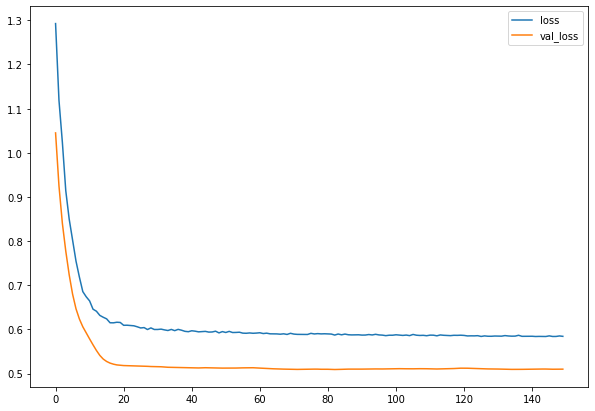

In [336]:
descent.plot()

In [337]:
Y_pred = sq.predict(X_test)

In [340]:
print("Mean Absolute error: ", mean_absolute_error(y_test, Y_pred))
print("Mean Squared error: ", mean_squared_error(y_test, Y_pred))

Mean Absolute error:  0.53533311666647
Mean Squared error:  0.5099274440070445


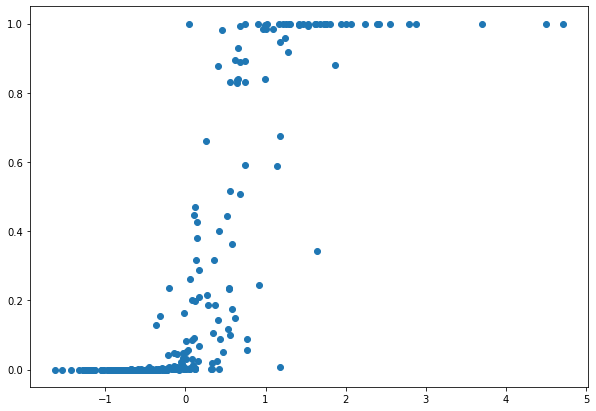

In [341]:
# Prediction plot
plt.scatter(y_test, Y_pred)